#### Exponential smoothing is a widely used smoothening technique in business analytics that assigns exponentially decreasing weights to past observations. It is particularly useful for forecasting future values based on historical data.

There are three main types of exponential smoothing methods: simple exponential smoothing, double exponential smoothing, and triple exponential smoothing (also known as Holt-Winters method).

In [ ]:
# Import the required libraries
import pandas as pd
import statsmodels.api as sm

In [ ]:
# Create a DataFrame with a time series data
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr'],
        'Sales': [100, 120, 110, 130]}
df = pd.DataFrame(data)

In [31]:
df

,Month,Sales
0,Jan,100
1,Feb,120
2,Mar,110
3,Apr,130


In [32]:
# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

In [33]:
df

,Sales
Month,
Jan,100
Feb,120
Mar,110
Apr,130


#### The smoothing_level parameter (denoted as α in the SES formula) controls the weight given to the most recent observation. A value of 0.3 means that the most recent observation has a weight of 0.3, and the previous smoothed value has a weight of 0.7.

#### Simple exponential smoothing is a straightforward method for forecasting time series data without trends or seasonal components. It uses exponentially decreasing weights to smooth out past observations and provides a flat forecast. The smoothing parameter α needs to be chosen or estimated from the data to apply this method effectively.

In [25]:
# Perform simple exponential smoothing
model = sm.tsa.SimpleExpSmoothing(df['Sales'])
ses_model = model.fit(smoothing_level=0.3)
df['Forecast'] = ses_model.fittedvalues

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [26]:
df

,Sales,Forecast
Month,,
Jan,100,100.0
Feb,120,100.0
Mar,110,106.0
Apr,130,107.2


<Axes: xlabel='Month'>

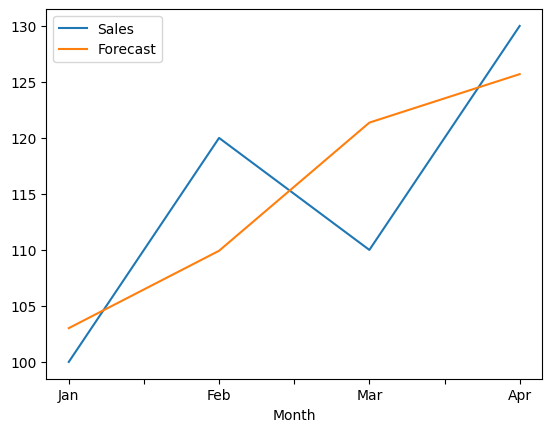

In [48]:
df.plot()

#### The smoothing_level parameter (denoted as α in the DES formula) controls the weight given to the most recent observation. The smoothing_slope parameter (denoted as β in the DES formula) controls the weight given to the trend component.

#### Double exponential smoothing is an extension of simple exponential smoothing that can handle time series with a linear trend. It uses two smoothing parameters, one for the level (α) and one for the trend (β), to capture the trend component in the data. The resulting forecasts will have a linear trend, unlike the flat forecasts of simple exponential smoothing.

In [38]:
# Perform double exponential smoothing
model = sm.tsa.ExponentialSmoothing(df['Sales'], trend='add')
des_model = model.fit(smoothing_level=0.3, smoothing_slope=0.2)
df['Forecast'] = des_model.fittedvalues

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
df

,Sales,Forecast
Month,,
Jan,100,103.013955
Feb,120,109.924797
Mar,110,121.366898
Apr,130,125.694356


<Axes: xlabel='Month'>

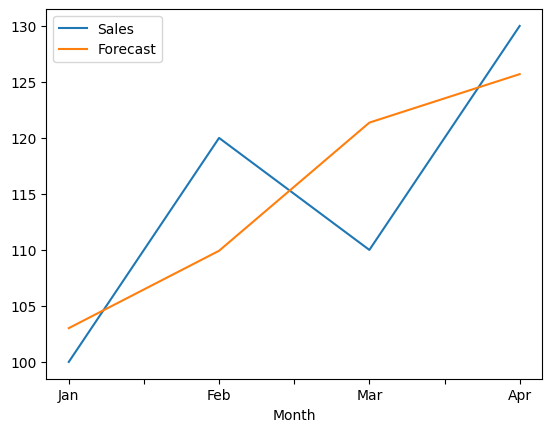

In [40]:
df.plot()

In [52]:
model = sm.tsa.ExponentialSmoothing(
    df['Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=3,
    initialization_method='legacy-heuristic'
)
tes_model = model.fit(
    smoothing_level=0.3,
    smoothing_slope=0.2,
    smoothing_seasonal=0.4
)
df['Forecast'] = tes_model.fittedvalues

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='Month'>

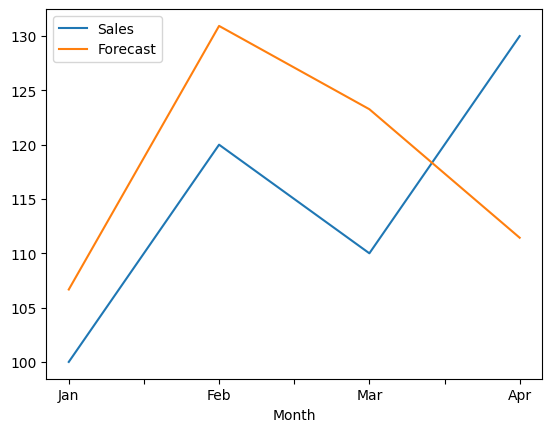

In [53]:
df.plot()

#### By examining the plot, you can compare the actual sales data with the forecasted values. This aids in evaluating the accuracy of the triple exponential smoothing model in capturing the underlying trend, seasonality, and level in the sales data.